<a href="https://colab.research.google.com/github/Ghonem22/Python-Data-Structres/blob/main/1_Arrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# implementation of python list step by step Starting from C ARRAY 

## C ARRAY

## Simple class

In [ ]:
import ctypes

class Array:
    def __init__(self, size):
        # FIXED size array from C language
        array_data_type = ctypes.py_object * size
        self.size = size
        self.memory = array_data_type()
        # initialize the array with None 
        for i in range(size):
            self.memory[i] = None


In [ ]:
# create instance of array with size 6
arr = Array(6)

# set array
for i in range (arr.size):
    arr.memory[i] = i ** 2

# get array
for i in range (arr.size):
    print(arr.memory[i], end = ' ')

# to delete all the values from the memory
del arr.memory

# not support del arr.memory[0]


0 1 4 9 16 25 

## Add special methods

**These special methods give our class many valuable features** 

In [ ]:
import ctypes


class Array:
    def __init__(self, size):
        array_data_type = ctypes.py_object * size
        self.size = size
        self.memory = array_data_type()
        for i in range(size):
            self.memory[i] = None
    
    # len(arr)
    def __len__(self):
        return self.size
    
    # arr[i]
    def __getitem__(self, idx):
        # Is valid idx?
        return self.memory[idx] 
    
    # arr[i] = x
    def __setitem__(self, idx, value):
        self.memory[idx] = value

    def __repr__(self):
        result = ''
        for i in range(self.size):
            result += str(self.memory[i]) + ', '
        return result

In [ ]:
array = Array(6)

for i in range(len(array)):
    array[i] = i + 1

for i in range(len(array)):
    print(array[i], end=', ')
print()
# 1, 2, 3, 4, 5, 6,

print(array)    # uses __repr__

1, 2, 3, 4, 5, 6, 
1, 2, 3, 4, 5, 6, 


In [ ]:
repr(array)

'1, 2, 3, 4, 5, 6, '

## appending operation  (Trival solution)

**Make memory dynamic**

In [ ]:
class Array:
    
    def __init__(self, size):
        # FIXED size array from C language
        array_data_type = ctypes.py_object * size
        self.size = size
        self.memory = array_data_type()
        # initialize the array with None 
        for i in range(size):
            self.memory[i] = None
            
    def append(self, item):
        
        self.size +=  1
        array_data_type = ctypes.py_object * self.size 
        new_memory = array_data_type()
        
        for i in range(self.size - 1):
            new_memory[i] = self.memory[i]

        new_memory[self.size - 1]  = item
        
        del self.memory
        self.memory = new_memory
        

In [ ]:
# create instance of array with size 6
arr = Array(6)

# set array
for i in range (arr.size):
    arr.memory[i] = i ** 2


In [ ]:
# get array
for i in range (arr.size):
    print(arr.memory[i], end = ' ')


0 1 4 9 16 25 

In [ ]:
arr.append(5)

In [ ]:
# get array
for i in range (arr.size):
    print(arr.memory[i], end = ' ')


0 1 4 9 16 25 5 

**The complexity of appending operation here is quadtritic + const, So the code is very slow when we try to append a many numbers (like 10^5)**

In [ ]:
import time

t= time.time()
for i in range(10**4):
    arr.append(i)

time.time() -t 

12.792577028274536

**In every append step, we move the old array to new one with append the new item. that make the code very slow** 

**Here we will use capacity trick, so we will take double the memory we need and move the old data to a space with double of the old size if when we use the old memory.** 

## appending operation (more optimised solution)

In [ ]:
class Array:
    
    def __init__(self, size):
        # FIXED size array from C language
        self.size = size
        self._capacity = max(32, self.size * 2)
        array_data_type = ctypes.py_object * self._capacity
        self.memory = array_data_type()
        # initialize the array with None 
        for i in range(self._capacity):
            self.memory[i] = None
            
    # we use this method when we use all the memory
    def expand_capacity(self):
        self._capacity *= 2
        print(f"expanding capacity to {self._capacity}")
        array_data_type = ctypes.py_object * self._capacity
        new_memory = array_data_type()
        for i in range(self.size):
            new_memory[i] = self.memory[i]
            
        del self.memory
        self.memory = new_memory

            
    def append(self, item):
        
        if self.size == self._capacity:
            self.expand_capacity()
            
        new_memory[self.size]  = item
        
        self.size +=  1
                

In [ ]:
# create instance of array with size 6
arr = Array(6)

# set array
for i in range(arr.size):
    arr.memory[i] = i ** 2


In [ ]:
# get array
for i in range (arr.size):
    print(arr.memory[i], end = ' ')


0 1 4 9 16 25 

### add the sepcial method to our array class

In [ ]:
import ctypes

class Array:
    
    def __init__(self, size):
        # FIXED size array from C language
        self.size = size
        self._capacity = max(32, self.size * 2)
        array_data_type = ctypes.py_object * self._capacity
        self.memory = array_data_type()
        # initialize the array with None 
        for i in range(self._capacity):
            self.memory[i] = None
            
    # we use this method when we use all the memory
    def expand_capacity(self):
        self._capacity *= 2
        print(f"expanding capacity to {self._capacity}")
        array_data_type = ctypes.py_object * self._capacity
        new_memory = array_data_type()
        for i in range(self.size):
            new_memory[i] = self.memory[i]
            
        del self.memory
        self.memory = new_memory

            
    def append(self, item):
        
        if self.size == self._capacity:
            self.expand_capacity()
            
        self.memory[self.size]  = item
        
        self.size +=  1
               
    # len(arr)
    def __len__(self):
        return self.size
    
    # arr[i]
    def __getitem__(self, idx):
        # Is valid idx?
        return self.memory[idx] 
    
    # arr[i] = x
    def __setitem__(self, idx, value):
        self.memory[idx] = value

    def __repr__(self):
        result = ''
        for i in range(self.size):
            result += str(self.memory[i]) + ', '
        return result

In [ ]:
# create instance of array with size 6
arr = Array(6)

# set array
for i in range(arr.size):
    arr[i] = i ** 2


In [ ]:
# get array
for i in range (arr.size):
    print(arr[i], end = ' ')


0 1 4 9 16 25 

In [ ]:
arr.append('item1')
arr.append('item2')

In [ ]:
# get array
for i in range (arr.size):
    print(arr[i], end = ' ')


0 1 4 9 16 25 item1 item2 

In [ ]:
# the special method __repr__ help us to do this trick 
print(arr)

0, 1, 4, 9, 16, 25, item1, item2, 


**Notice that the expand method is invoked when we use all the memory. We create a memory with double of the old size and move the old arr to the new one**

**the expand process is quadrtic, but the append is linear**

In [ ]:
import time

t= time.time()
for i in range(10**4):
    arr.append(i)

time.time() -t 

expanding capacity to 64
expanding capacity to 128
expanding capacity to 256
expanding capacity to 512
expanding capacity to 1024
expanding capacity to 2048
expanding capacity to 4096
expanding capacity to 8192
expanding capacity to 16384


0.011185169219970703

**We can see that the optimized solution is faster than the trival one by factor ~= (21.3 / 0.0244)  ~= 873**

## Insertion Operation

In [ ]:
import ctypes

class Array:
    
    def __init__(self, size):
        # FIXED size array from C language
        self.size = size
        self._capacity = max(32, self.size * 2)
        array_data_type = ctypes.py_object * self._capacity
        self.memory = array_data_type()
        # initialize the array with None 
        for i in range(self._capacity):
            self.memory[i] = None
            
    # we use this method when we use all the memory
    def expand_capacity(self):
        self._capacity *= 2
        print(f"expanding capacity to {self._capacity}")
        array_data_type = ctypes.py_object * self._capacity
        new_memory = array_data_type()
        for i in range(self.size):
            new_memory[i] = self.memory[i]
            
        del self.memory
        self.memory = new_memory

            
    def append(self, item):
        
        if self.size == self._capacity:
            self.expand_capacity()
            
        self.memory[self.size]  = item
        
        self.size +=  1

        
    def insert(self, idx, item):
        if idx >= self.size:
            self.append(item)
            return
        if self.size == self._capacity:
            self.expand_capacity()
        
        
        for i in range(self.size, idx -1, -1):
            self.memory[i] = self.memory[i-1]
            
        self.memory[idx] = item
        self.size += 1
        
    # len(arr)
    def __len__(self):
        return self.size
    
    # arr[i]
    def __getitem__(self, idx):
        # Is valid idx?
        return self.memory[idx] 
    
    # arr[i] = x
    def __setitem__(self, idx, value):
        self.memory[idx] = value

    def __repr__(self):
        result = ''
        for i in range(self.size):
            result += str(self.memory[i]) + ', '
        return result

In [ ]:
# create instance of array with size 6
arr = Array(6)

# set array
for i in range(arr.size):
    arr[i] = i ** 2


In [ ]:
arr

0, 1, 4, 9, 16, 25, 

In [ ]:
arr.insert(3, 30)

In [ ]:
arr

0, 1, 4, 30, 9, 16, 25, 

In [ ]:
arr.insert(0, 20)
arr.insert(2, 333)

In [ ]:
arr

20, 0, 333, 1, 4, 30, 9, 16, 25, 

In [ ]:
arr.insert(13, 303)
arr

20, 0, 333, 1, 4, 30, 9, 16, 25, 303, 

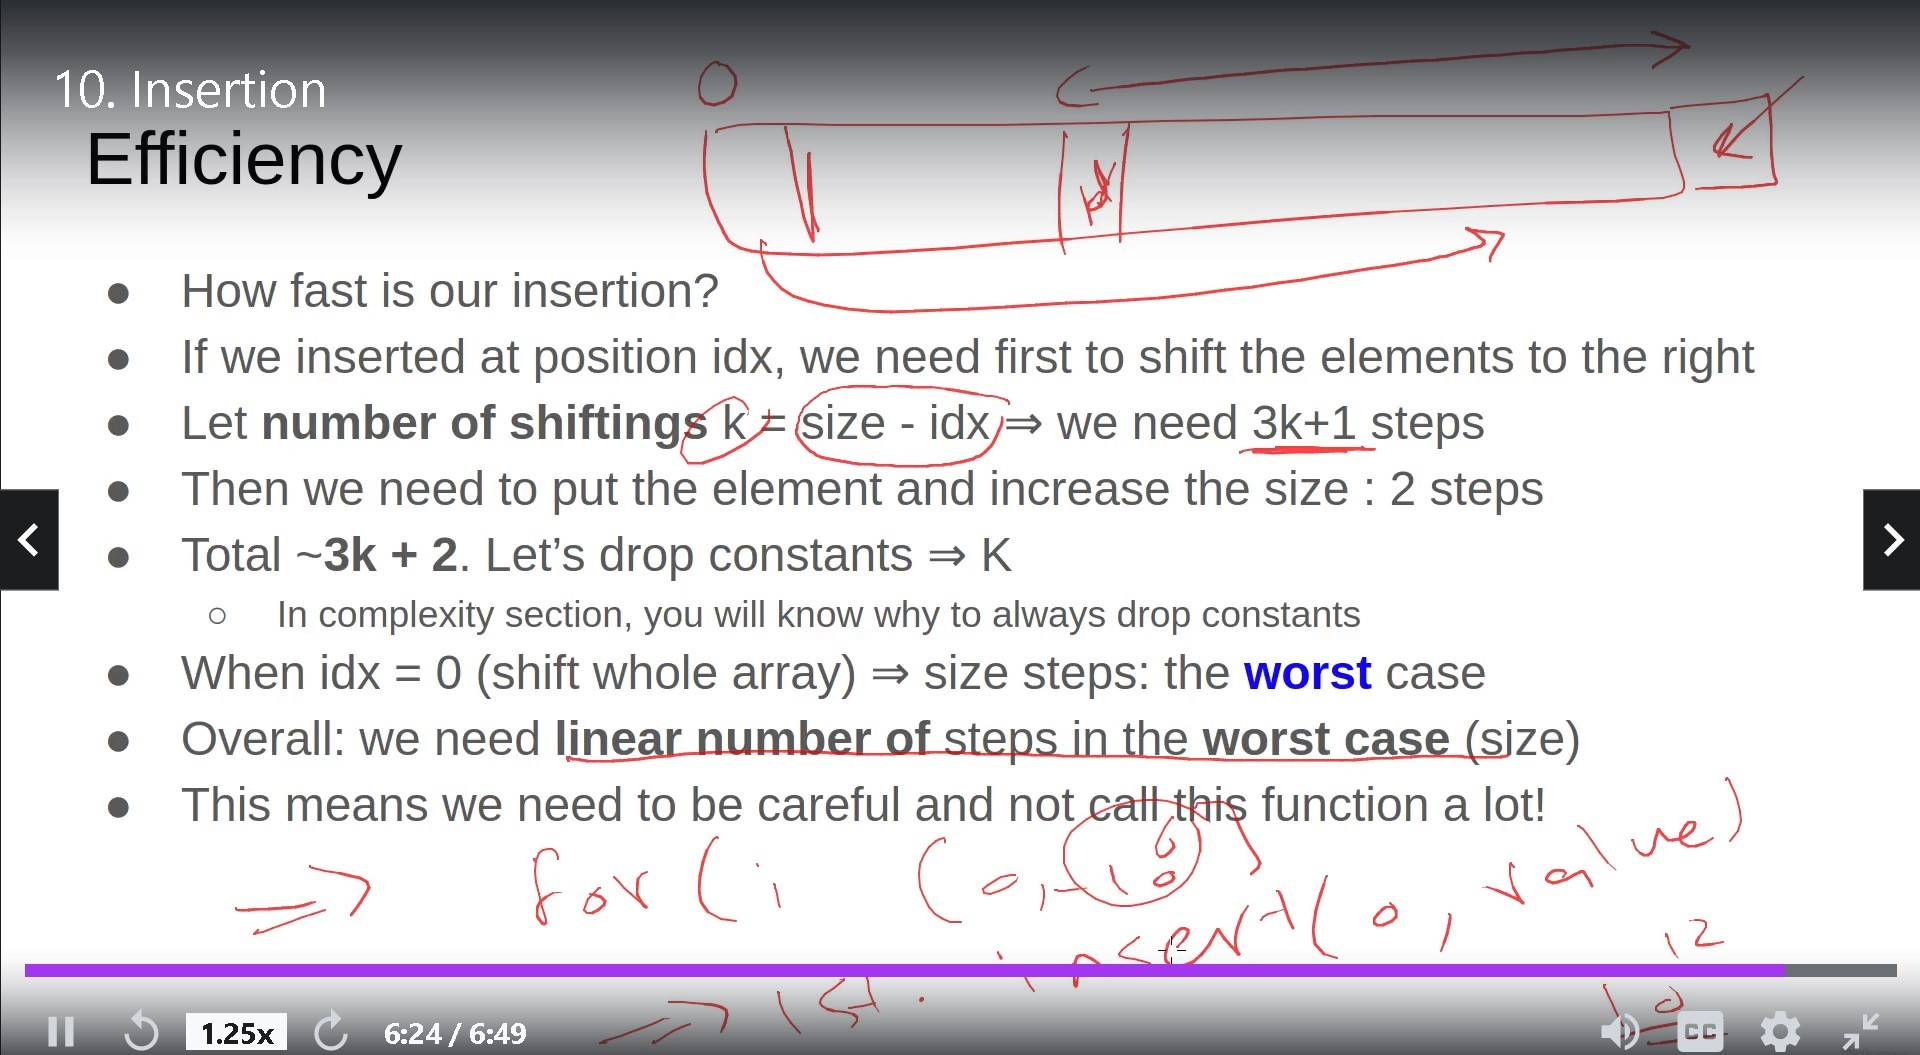

## Abstract Data Types

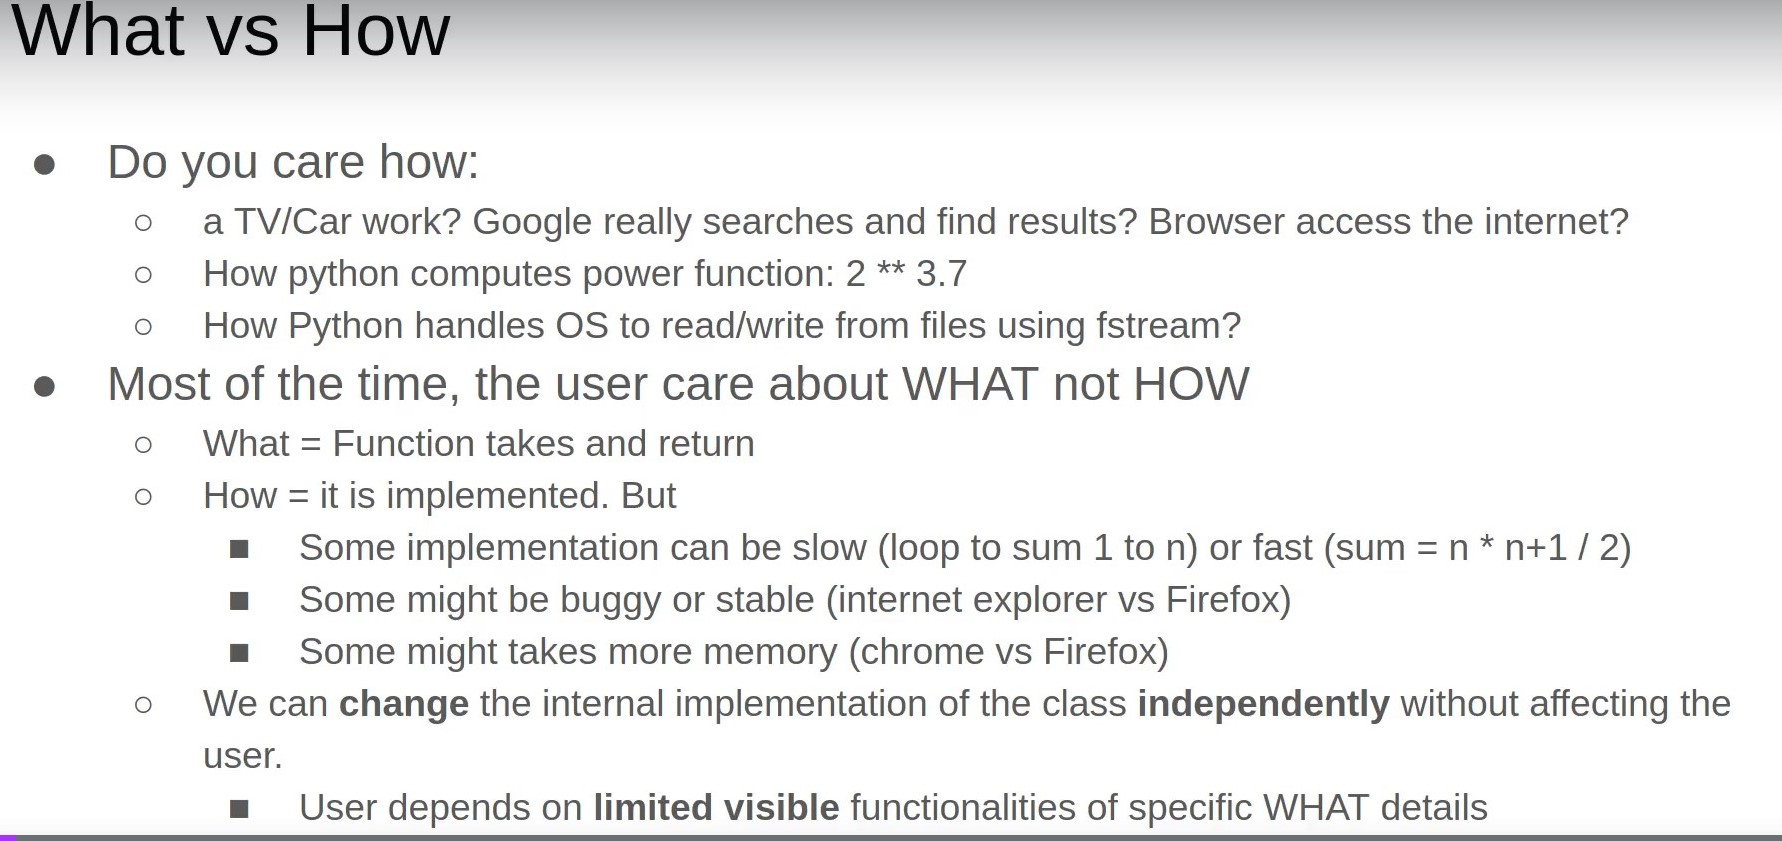

# Homework

## Problem 1: Negative Indexing

---

## Problem 2: Right rotation

---

## Problem 3: Left rotation

In [ ]:
import ctypes

class Array:
    
    def __init__(self, size):
        # FIXED size array from C language
        self.size = size
        self._capacity = max(32, self.size * 2)
        array_data_type = ctypes.py_object * self._capacity
        self.memory = array_data_type()
        # initialize the array with None 
        for i in range(self._capacity):
            self.memory[i] = None
            
    # we use this method when we use all the memory
    def expand_capacity(self):
        self._capacity *= 2
        print(f"expanding capacity to {self._capacity}")
        array_data_type = ctypes.py_object * self._capacity
        new_memory = array_data_type()
        for i in range(self.size):
            new_memory[i] = self.memory[i]
            
        del self.memory
        self.memory = new_memory

            
    def append(self, item):
        
        if self.size == self._capacity:
            self.expand_capacity()
            
        self.memory[self.size]  = item
        
        self.size +=  1

        
    def insert(self, idx, item):
        
        if idx >= self.size:
            self.append(item)
            return

        if idx < -self.size:
            idx = -self.size

        if idx < 0:
            idx += self.size


        if self.size == self._capacity:
            self.expand_capacity()
        
        
        for i in range(self.size, idx -1, -1):
            self.memory[i] = self.memory[i-1]
            
        self.memory[idx] = item
        self.size += 1
        
        
    def right_rotate(self):
        self.insert(0,self.memory[self.size -1])
        self.memory[self.size -1] = None
        self.size -= 1
        
        
    def left_rotate(self):
        fist_elem  = self.memory[0]
        
        for i in range(self.size):
            self.memory[i] = self.memory[i +1] 
            
        self.memory[self.size -1] = fist_elem
        
    # len(arr)
    def __len__(self):
        return self.size
    
    # arr[i]
    def __getitem__(self, idx):
        # Is valid idx?
        return self.memory[idx] 
    
    # arr[i] = x
    def __setitem__(self, idx, value):
        self.memory[idx] = value

    def __repr__(self):
        result = ''
        for i in range(self.size):
            result += str(self.memory[i]) + ', '
        return result

In [ ]:
# create instance of array with size 6
arr = Array(4)

# set array
for i in range(arr.size):
    arr[i] = i +1

arr

1, 2, 3, 4, 

In [ ]:
arr.insert(-1, -10)
arr

1, 2, 3, -10, 4, 

In [ ]:
arr.insert(-2, -20)
arr

1, 2, 3, -20, -10, 4, 

In [ ]:
arr.insert(-3, -30)
arr

1, 2, 3, -30, -20, -10, 4, 

In [ ]:
arr.insert(-30, 0)
arr

0, 1, 2, 3, -30, -20, -10, 4, 

In [ ]:
def test_insert():
    array = Array(0)
    array.append(1)
    array.append(2)
    array.append(3)
    array.append(4)
    # 1, 2, 3, 4
    array.insert(-1, -10)
    print(array)  # 1, 2, 3, -10, 4,

    array.insert(-2, -20)
    print(array)  # 1, 2, 3, -20, -10, 4,

    array.insert(-3, -30)
    print(array)  # 1, 2, 3, -30, -20, -10, 4,

    array.insert(-4, -40)
    print(array)  # 1, 2, 3, -40, -30, -20, -10, 4,

    array.insert(-5, -50)
    print(array)  # 1, 2, 3, -50, -40, -30, -20, -10, 4,

    array.insert(8, 80)
    print(array)  # 1, 2, 3, -50, -40, -30, -20, -10, 80, 4,

    array.insert(20, 90)
    print(array)  # 1, 2, 3, -50, -40, -30, -20, -10, 80, 4, 90,


def test_right_rotate():
    array = Array(0)

    array.right_rotate()
    print(array)

    array = Array(0)
    array.append(0)
    array.append(1)
    array.append(2)
    array.append(3)
    array.append(4)

    array.right_rotate()
    print(array)
    # 4, 0, 1, 2, 3,

    array.right_rotate()
    print(array)
    # 3, 4, 0, 1, 2,

    
def test_left_rotate():
    array = Array(0)

    array.right_rotate()
    print(array)

    array = Array(0)
    array.append(0)
    array.append(1)
    array.append(2)
    array.append(3)
    array.append(4)

    array.left_rotate()
    print(array)
    # 1, 2, 3, 4, 0,

    array.left_rotate()
    print(array)
    # 2, 3, 4, 0, 1,
    



4, 0, 1, 2, 3, 
3, 4, 0, 1, 2, 


In [ ]:
print("\n***************** test_insert *****************")
test_insert()

print("\n***************** test_right_rotate *****************")
test_right_rotate()

print("\n***************** test_left_rotate *****************")
test_left_rotate()


***************** test_insert *****************
1, 2, 3, -10, 4, 
1, 2, 3, -20, -10, 4, 
1, 2, 3, -30, -20, -10, 4, 
1, 2, 3, -40, -30, -20, -10, 4, 
1, 2, 3, -50, -40, -30, -20, -10, 4, 
1, 2, 3, -50, -40, -30, -20, -10, 80, 4, 
1, 2, 3, -50, -40, -30, -20, -10, 80, 4, 90, 

***************** test_right_rotate *****************

4, 0, 1, 2, 3, 
3, 4, 0, 1, 2, 

***************** test_left_rotate *****************

1, 2, 3, 4, 0, 
2, 3, 4, 0, 1, 


## Problem  4: Right Rotation with step

**pseudo code:**

1.  if steps >= self.size:

    steps%= self.size          # after self.size steps array become the same
    

2. take num of steps elements from the end if the array and put them at the begining of the array


---

## Problem 5: Pop a position


**pseudo code:**

1.  get the element array[index]


2. Move every element after the index to the elemnt before it
    

3. return array[index]

---

## Problem 6: index_transposition

In [ ]:
import ctypes

class Array:
    
    def __init__(self, size, initial_val = None):
        # FIXED size array from C language
        self.size = size
        self._capacity = max(32, self.size * 2)
        array_data_type = ctypes.py_object * self._capacity
        self.memory = array_data_type()
        # initialize the array with None 
        for i in range(self._capacity):
            self.memory[i] = initial_val
            
    # we use this method when we use all the memory
    def expand_capacity(self):
        self._capacity *= 2
        print(f"expanding capacity to {self._capacity}")
        array_data_type = ctypes.py_object * self._capacity
        new_memory = array_data_type()
        for i in range(self.size):
            new_memory[i] = self.memory[i]
            
        del self.memory
        self.memory = new_memory

            
    def append(self, item):
        
        if self.size == self._capacity:
            self.expand_capacity()
            
        self.memory[self.size]  = item
        
        self.size +=  1

        
    def insert(self, idx, item):
        
        if idx >= self.size:
            self.append(item)
            return

        if idx < -self.size:
            idx = -self.size

        if idx < 0:
            idx += self.size


        if self.size == self._capacity:
            self.expand_capacity()
        
        
        for i in range(self.size, idx -1, -1):
            self.memory[i] = self.memory[i-1]
            
        self.memory[idx] = item
        self.size += 1
        
        
    def right_rotate(self):
        self.insert(0,self.memory[self.size -1])
        self.memory[self.size -1] = None
        self.size -= 1
        
        
    def left_rotate(self):
        fist_elem  = self.memory[0]
        
        for i in range(self.size):
            self.memory[i] = self.memory[i +1] 
            
        self.memory[self.size -1] = fist_elem
        
        
    def right_rotate_steps(self, s):
        
        # array return to its origin if we rotate it self.size time
        if s >= self.size:
            s %= self.size
        
        if s == 0:
            return
        
        array_data_type = ctypes.py_object * (self.size - s)
        new_memory = array_data_type()

        # save the begining of the array so we move it later
        for i in range(self.size - s ):
            new_memory[i] = self.memory[i]
            
        # move s num of the array from the end to begining with rotation poistion
        for i in range(s ):
            self.memory[i] = self.memory[self.size - s + i]
        
        # write the values of the begining of the arr again
        for i in range(self.size - s ):
            self.memory[s+i] = new_memory[ i]
            
    def right_rotate_stepsX(self, times):
        times %= self.size
        for step in range(times):
            self.right_rotate()

        
    def pop(self, idx):
        assert idx >= -self.size and idx < self.size
        
        if idx < 0:
            idx += self.size

        element = self.memory[idx]
        
        for i in range(idx, self.size -1):
            self.memory[i] = self.memory[i +1]
        self.size -= 1
        return element
    
    def index_transposition(self, value):
        for idx in range(self.size):
            if self.memory[idx] == value:
                if idx == 0:
                    return 0
                # Swap the 2 elements
                self.memory[idx], self.memory[idx - 1] = self.memory[idx - 1], self.memory[idx]
                return idx - 1
        return -1

    # len(arr)
    def __len__(self):
        return self.size
    
    # arr[i]
    def __getitem__(self, idx):
        # Is valid idx?
        return self.memory[idx] 
    
    # arr[i] = x
    def __setitem__(self, idx, value):
        self.memory[idx] = value

    def __repr__(self):
        result = ''
        for i in range(self.size):
            result += str(self.memory[i]) + ', '
        return result

**Here is a comparsion between My solution "right_rotate_steps" and the other solution**

**You can see that the first one is much more optimised especially when we work with very long arrays**

In [ ]:
import time

t = time.time()
# create instance of array with size 6
array = Array(10**4)

# set array
for i in range(array.size):
    array[i] = i +1


    
array.right_rotate_steps(123456789)
time.time() - t


0.027707338333129883

In [ ]:
import time

t = time.time()
# create instance of array with size 6
array = Array(10**4)

# set array
for i in range(array.size):
    array[i] = i +1

    
array.right_rotate_stepsX(123456789)
time.time() - t


19.10546374320984

In [ ]:
def test_right_rotate_steps():
    array = Array(0)
    array.append(0)
    array.append(1)
    array.append(2)
    array.append(3)
    array.append(4)
    print(array)
    # 0, 1, 2, 3, 4,

    array.right_rotate_steps(3)
    print(array)
    # 2, 3, 4, 0, 1,
    array.right_rotate_steps(7)
    print(array)
    # 0, 1, 2, 3, 4,

    array.right_rotate_steps(123456789)
    print(array)
    # 1, 2, 3, 4, 0,
    

def test_index_transposition():

    array = Array(0)
    array.append(10)
    array.append(20)
    array.append(30)
    array.append(40)
    array.append(50)
    print(array)
    # 10, 20, 30, 40, 50,

    print(array.index_transposition(10))
    print(array)    # 0
    # 10, 20, 30, 40, 50,

    print(array.index_transposition(50))
    print(array)    # 3
    # 10, 20, 30, 50, 40,

    print(array.index_transposition(50))
    print(array)    # 2
    # 10, 20, 50, 30, 40,

    print(array.index_transposition(60))    # -1


def test_pop():
    array = Array(0)
    array.append(10)
    array.append(20)
    array.append(30)
    array.append(40)
    print(array)
    # 10, 20, 30, 40,

    print(array.pop(0))  # 10
    print(array)
    # 20, 30, 40,

    print(array.pop(2))  # 40
    print(array)
    # 20, 30,
    array.append(60)
    array.append(70)
    array.append(80)

    print(array.pop(-1))  # 80
    print(array)
    # 20, 30, 60, 70,

    print(array.pop(-4))  # 20
    print(array)
    # 30, 60, 70,
    # pop index out of range
    # array.pop(-4)
    # array.pop(3)


In [ ]:
print("*************** test_right_rotate_steps ***************")
test_right_rotate_steps()

print("*************** test_pop ***************")
test_pop()

print("*************** test_index_transposition ***************")
test_index_transposition()

*************** test_right_rotate_steps ***************
0, 1, 2, 3, 4, 
2, 3, 4, 0, 1, 
0, 1, 2, 3, 4, 
1, 2, 3, 4, 0, 
*************** test_pop ***************
10, 20, 30, 40, 
10
20, 30, 40, 
40
20, 30, 
80
20, 30, 60, 70, 
20
30, 60, 70, 
*************** test_index_transposition ***************
10, 20, 30, 40, 50, 
0
10, 20, 30, 40, 50, 
3
10, 20, 30, 50, 40, 
2
10, 20, 50, 30, 40, 
-1


## problem 7: Create 2d array


* create new class called Array2D
* use composition to create an array for the rows
* fill the array of rows with the values (array)

In [ ]:
class Array2D:
    def __init__(self,rows, cols, initial_val = None):
        self.rows = rows
        self.cols = cols
        self.grid = Array(rows, initial_val)            # using Composition
        for i in range(rows):
            self.grid[i] = Array(cols, initial_val)
            
    def __getitem__(self, idx):
        r, c = idx[0], idx[1]
        return self.grid[r][c] 

    def __setitem__(self, idx, value):
        r, c = idx[0], idx[1]
        self.grid[r][c] = value

    def __repr__(self):
        result = ''
        for i in range(self.rows):
            result += str(self.grid[i]) + '\n'
        return result


In [ ]:
arr2d = Array2D(2, 4, -1)
arr2d[(0, 2)] = 3
arr2d[(1, 1)] = 5
arr2d[(1, 3)] = 7
print(arr2d)
# 0, 0, 3, 0,
# 0, 5, 0, 7,
print(arr2d[(1, 3)])    # 7


-1, -1, 3, -1, 
-1, 5, -1, 7, 

7
